# Table of Contents

## 1.0 Setup
## 2.0 Data Cleaning
## 3.0 Exploring relationships
    3.1 Correlations
    3.2 Scatterplots
    3.3 Pair plots
    3.4 Categorical plots
## 4.0 Exporting data

## 1.0 Setup

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import statistics

In [2]:
# Defining the path

path = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 6\11-22 Food Balance Sheet Analysis\2.0 Data')

In [3]:
# Importing fbs.pkl as fbs

fbs = pd.read_pickle(os.path.join(path, '2.2 Prepared data', 'fbs.pkl'))

In [4]:
# Setting up graph display options

%matplotlib inline

## 2.0 Data cleaning

In [5]:
fbs.shape

(3000600, 7)

In [6]:
# Renaming column 'Area' into 'Country'

fbs.rename(columns = {'Area' : 'Country'}, inplace = True)

In [7]:
# Renaming column 'Area Code' into 'Country Code'

fbs.rename(columns = {'Area Code' : 'Country Code'}, inplace = True)

In [8]:
fbs.head()

,Country,Element Code,Element,Item,Year,Unit,Value
0,Afghanistan,511,Total Population - Both sexes,Population,2010,1000 persons,29186.0
1,Afghanistan,511,Total Population - Both sexes,Population,2011,1000 persons,30117.0
2,Afghanistan,511,Total Population - Both sexes,Population,2012,1000 persons,31161.0
3,Afghanistan,511,Total Population - Both sexes,Population,2013,1000 persons,32270.0
4,Afghanistan,511,Total Population - Both sexes,Population,2014,1000 persons,33371.0


In [9]:
fbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000600 entries, 0 to 200039
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Country       object 
 1   Element Code  object 
 2   Element       object 
 3   Item          object 
 4   Year          int64  
 5   Unit          object 
 6   Value         float64
dtypes: float64(1), int64(1), object(5)
memory usage: 183.1+ MB


## 3.0 Exploring relationships

### 3.1 Correlations

Since the data set contains over a hundred variables in both rows and columns, the first step is to filter out variables which give a general picture of a country's capability to feed itself.
Those variables are Production, Import, Export, Total population, Domestic Supply Quantity and Food.

In [10]:
# Creating a data frame with needed variables

element_codes = ['511', '5511', '5611', '5911', '5301', '5142']
fbs1 = fbs[fbs["Element Code"].isin(element_codes)]

In [11]:
fbs1

,Country,Element Code,Element,Item,Year,Unit,Value
0,Afghanistan,511,Total Population - Both sexes,Population,2010,1000 persons,29186.0
1,Afghanistan,511,Total Population - Both sexes,Population,2011,1000 persons,30117.0
2,Afghanistan,511,Total Population - Both sexes,Population,2012,1000 persons,31161.0
3,Afghanistan,511,Total Population - Both sexes,Population,2013,1000 persons,32270.0
4,Afghanistan,511,Total Population - Both sexes,Population,2014,1000 persons,33371.0
...,...,...,...,...,...,...,...
199995,Zimbabwe,5142,Food,Miscellaneous,2015,1000 tonnes,29.0
199996,Zimbabwe,5142,Food,Miscellaneous,2016,1000 tonnes,30.0
199997,Zimbabwe,5142,Food,Miscellaneous,2017,1000 tonnes,15.0
199998,Zimbabwe,5142,Food,Miscellaneous,2018,1000 tonnes,16.0


In [12]:
# Creating a crosstab with the data for the correlation matrix
# The crosstab contains mean values for each variable and country for the time period from 2010 - 2019

ct1 = pd.crosstab(
                        fbs1['Country'], fbs1['Element'],
                        values = fbs1['Value'], aggfunc = 'mean',
                        dropna = False
                        ).reset_index()

ct1

Element,Country,Domestic supply quantity,Export Quantity,Food,Import Quantity,Production,Total Population - Both sexes
0,Afghanistan,179.486857,11.576763,170.102359,58.629336,217.419188,33741.2
1,Albania,50.340385,2.099728,40.786616,9.844953,65.947842,2901.6
2,Algeria,449.583848,8.237230,348.834351,183.963859,434.687213,39403.5
3,Angola,286.687785,1.100793,205.286628,42.068218,364.514131,27482.1
4,Antigua and Barbuda,0.865092,0.007495,0.585941,0.686329,0.471970,92.9
...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),292.403220,0.630650,201.658156,80.027349,270.765316,29325.1
176,Viet Nam,1071.527513,343.114523,720.570469,178.711100,1617.419629,92203.4
177,Yemen,100.307119,5.907090,94.202818,70.204155,58.154954,26156.8
178,Zambia,130.138052,8.878175,68.084709,4.328714,202.919196,15673.0


In [13]:
# Renaming column 'Total Population - Both sexes' into 'Total Population'

ct1.rename(columns = {'Total Population - Both sexes' : 'Total Population'}, inplace = True)

In [14]:
# Renaming column 'Domestic supply quantity' into 'Domestic Supply Quantity'

ct1.rename(columns = {'Domestic supply quantity' : 'Domestic Supply Quantity'}, inplace = True)

In [15]:
# Creating the correlation matrix

ct1.corr()

Element,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population
Element,,,,,,
Domestic Supply Quantity,1.000000,0.578600,0.950753,0.783774,0.990919,0.921118
Export Quantity,0.578600,1.000000,0.385214,0.515806,0.661645,0.343716
Food,0.950753,0.385214,1.000000,0.816348,0.910465,0.964023
Import Quantity,0.783774,0.515806,0.816348,1.000000,0.745565,0.706928
Production,0.990919,0.661645,0.910465,0.745565,1.000000,0.892172
Total Population,0.921118,0.343716,0.964023,0.706928,0.892172,1.000000


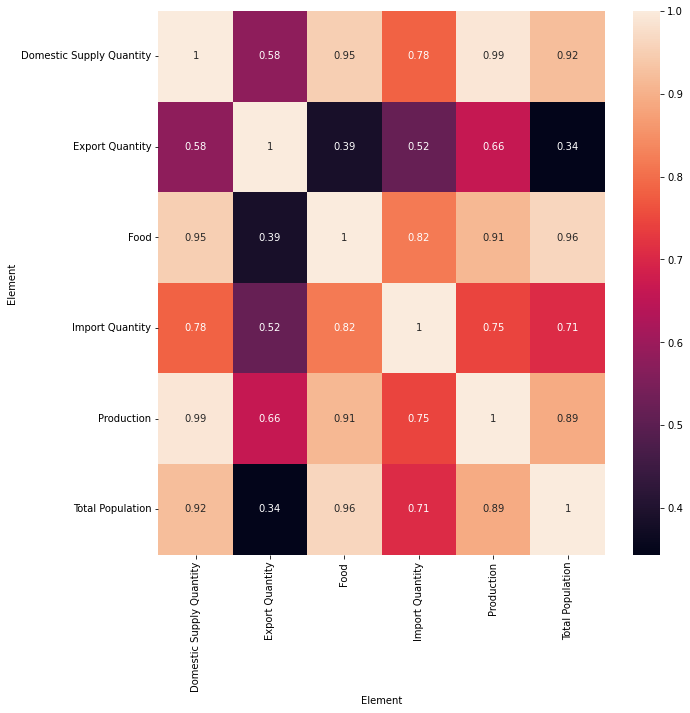

In [16]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn
corr = sns.heatmap(ct1.corr(), annot = True, ax = ax)

The food supply and consumption are, firstly, driven by the size of the population, i.e. the number of people which need to be fed. To achieve that, countries produce and import food, which is why Import Quantity and Production have an almost perfect positive correlation to the Total Population. Domestic Supply Quantity and Food are variables calculated using, among others, Production, Import Quantity and Export Quantity, so the strong positive correlation to Total Population is also expected.

Export Quantity shows positive correlation to all variables. It has the strongest relationship with Production (exporting own produced commodities) and Import Quantity (this may indicate imports that are later either re-exported or used as a secondary resource for production of export commodities).

### 3.2 Scatter plots

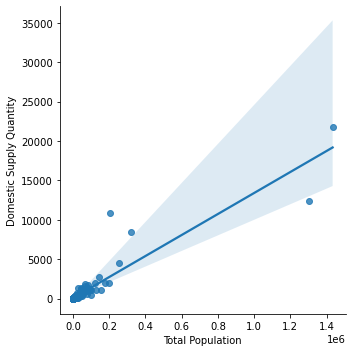

In [17]:
# Creating a scatter plot of the 'Total Population' and 'Domestic Supply Quantity' variables

sns.lmplot(x = 'Total Population', y = 'Domestic Supply Quantity', data = ct1)

As expected, the Total Population and Domestic Supply Quantity show strong positive relationship with minimal number of outliers (which should be invesigated further).

### 3.3 Pair plots

In [18]:
# Creating a subset for pair plots

ct1_sub = ct1[['Total Population', 'Production', 'Import Quantity', 'Export Quantity']]

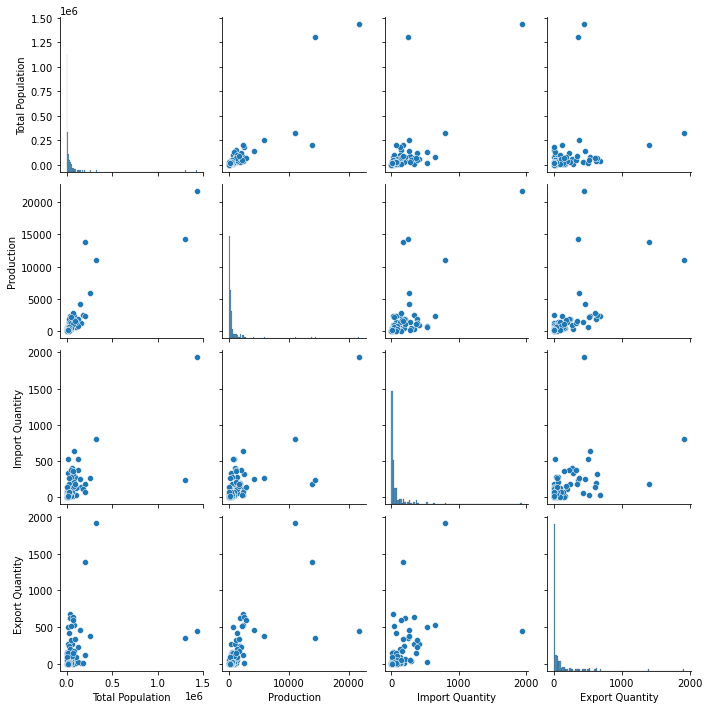

In [19]:
# Creating a pair plot

pp1 = sns.pairplot(ct1_sub)

The pair plots show that the Total Population is indeed closely related to all three variables. Outliers are the most interesting aspect since they deviate from the expected relationship(s) between the variables.

### 3.4 Categorical plots

To further explore the relationship between variables, I wanted to introduce the Import Dependency Ratio.
The first step is calculating Import dependency ratio, then to categorize it based on it's values and then creating a categorical plot.

In [20]:
# Creating Import Dependency Ratio variable

ct1['Import Dependency Ratio'] = ct1['Import Quantity'] * 100 / (ct1['Production'] + ct1['Import Quantity'] - ct1['Export Quantity'])

In [21]:
# Setting up display options

pd.set_option('display.max_rows', None)

In [22]:
ct1

Element,Country,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio
0,Afghanistan,179.486857,11.576763,170.102359,58.629336,217.419188,3.374120e+04,22.168467
1,Albania,50.340385,2.099728,40.786616,9.844953,65.947842,2.901600e+03,13.359402
2,Algeria,449.583848,8.237230,348.834351,183.963859,434.687213,3.940350e+04,30.137563
3,Angola,286.687785,1.100793,205.286628,42.068218,364.514131,2.748210e+04,10.374878
4,Antigua and Barbuda,0.865092,0.007495,0.585941,0.686329,0.471970,9.290000e+01,59.639123
5,Argentina,1342.280881,679.125152,411.657386,28.497982,2302.371667,4.284680e+04,1.725326
6,Armenia,45.790044,2.496912,34.620377,9.080705,75.911389,2.916500e+03,11.007558
7,Australia,760.241937,423.269300,255.903174,61.131056,1333.165201,2.373300e+04,6.295506
8,Austria,203.015216,71.773605,88.389652,88.885618,280.691572,8.662900e+03,29.847061
9,Azerbaijan,130.208103,10.299678,100.388698,29.268245,169.999665,9.553600e+03,15.488447


<AxesSubplot:xlabel='Import Dependency Ratio', ylabel='Count'>

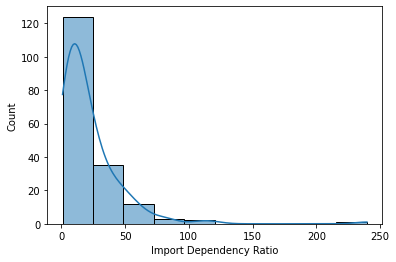

In [23]:
# Creating a histogram of the Import Dependency Ratio

sns.histplot(ct1['Import Dependency Ratio'], bins = 10, kde = True)

In [24]:
# Calculating basic descriptive statistics to decide on the IDR categories

ct1['Import Dependency Ratio'].describe()

count    177.000000
mean      21.958703
std       25.946175
min        0.988550
25%        6.512645
50%       14.144828
75%       28.416864
max      239.583011
Name: Import Dependency Ratio, dtype: float64

In [25]:
statistics.mode(ct1['Import Dependency Ratio'])

22.168467408735616

The histogram and the descriptive statistics show that the Import Dependency Ratio is right-skewed where 75% of the countries have IDR between 1% and 28%, while the range extends to 239%. The mode is 22%.

Based on those parameters, the ranges will be as follows:
Low dependency: IDR is 15% and less
Medium dependency: IDR is between 16% - 35%
High dependency: IDR is over 36%

In [26]:
# Creating IDR category flag

ct1.loc[ct1['Import Dependency Ratio'] < 16, 'IDR category'] = 'Low dependency'

In [27]:
ct1.loc[(ct1['Import Dependency Ratio'] >= 16) & (ct1['Import Dependency Ratio'] < 36), 'IDR category'] = 'Medium dependency'

In [28]:
ct1.loc[ct1['Import Dependency Ratio'] >= 36, 'IDR category'] = 'High dependency'

In [29]:
ct1

Element,Country,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio,IDR category
0,Afghanistan,179.486857,11.576763,170.102359,58.629336,217.419188,3.374120e+04,22.168467,Medium dependency
1,Albania,50.340385,2.099728,40.786616,9.844953,65.947842,2.901600e+03,13.359402,Low dependency
2,Algeria,449.583848,8.237230,348.834351,183.963859,434.687213,3.940350e+04,30.137563,Medium dependency
3,Angola,286.687785,1.100793,205.286628,42.068218,364.514131,2.748210e+04,10.374878,Low dependency
4,Antigua and Barbuda,0.865092,0.007495,0.585941,0.686329,0.471970,9.290000e+01,59.639123,High dependency
5,Argentina,1342.280881,679.125152,411.657386,28.497982,2302.371667,4.284680e+04,1.725326,Low dependency
6,Armenia,45.790044,2.496912,34.620377,9.080705,75.911389,2.916500e+03,11.007558,Low dependency
7,Australia,760.241937,423.269300,255.903174,61.131056,1333.165201,2.373300e+04,6.295506,Low dependency
8,Austria,203.015216,71.773605,88.389652,88.885618,280.691572,8.662900e+03,29.847061,Medium dependency
9,Azerbaijan,130.208103,10.299678,100.388698,29.268245,169.999665,9.553600e+03,15.488447,Low dependency


In [30]:
ct1[('IDR category')].value_counts(dropna = False)

Low dependency       99
Medium dependency    47
High dependency      31
NaN                   3
Name: IDR category, dtype: int64

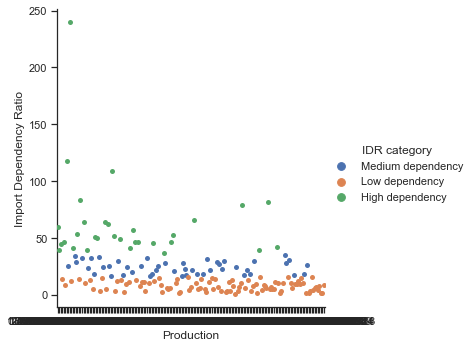

In [31]:
# Creating a categorical plot in seaborn using the IDR categories

sns.set(style = "ticks")

cp_IDR = sns.catplot(x = 'Production', y = 'Import Dependency Ratio',
                     hue = "IDR category", data = ct1)

The categorical plot shows that, generally speaking, dependency on import is equally distributed among countries, especially for medium and low dependency categories.
In the high dependency category a slightly more dispersed distribution can be seen with more countries with high IDR and low production, and less countries with both high IDR and high production.

To answer the question about the ability of a country to feed itself, other variables such as self-sufficiency ratio and per capita food supply should be taken into consideration because the high import dependency ratio could, for instance, indicate that the country imports food commodities not just to increase the domestic food supply, but to use them in the production of other foods which are then exported.

Even though the import dependency ratio answers the question about the level of dependence of countries on food import, the influence of the part of the imported commodities that are not used for domestic consumption should always be considered, especially in the case of the outliers.

There are several hypothesis that could be tested:

1. Countries with extremely high import dependency ratios use the majority of the imported food for food production and are exporting those commodities.

2. Countries with high import dependency ratios have low values of food production per capita.

3. Countries with high self-sufficiency ratios have high values of food production per capita.

## 4.0 Exporting data

In [32]:
# Exporting fbs with countries only as pickle

fbs.to_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_countries.pkl'))

In [33]:
# Exporting fbs1 with selected variables as pickle

fbs1.to_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_6_variables.pkl'))

In [34]:
# Exporting ct1 as pickle

ct1.to_pickle(os.path.join(path, '2.2 Prepared data', 'ct_6_variables.pkl'))

In [35]:
# Defining the path for visualizations

path1 = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 6\11-22 Food Balance Sheet Analysis\4.0 Analysis')

In [36]:
# Exporting the correlation heatmap

corr.figure.savefig(os.path.join(path1, '4.1 Visualizations', 'corr_heatmap.png'))

In [37]:
# Exporting pair plot

pp1.figure.savefig(os.path.join(path1, '4.1 Visualizations', 'pair_plot.png'))

In [38]:
# Exporting categorical plot

cp_IDR.figure.savefig(os.path.join(path1, '4.1 Visualizations', 'IDR_cat_plot.png'))

In [39]:
# Exporting fbs1 with selected variables as csv

fbs1.to_csv(os.path.join(path, '2.2 Prepared data', 'fbs_6_variables.csv'))